# Name : Vipashyana Uttam Jawale
## Assignement No 07
### LOGISTIC REGRESSION

### Step 1: Data Exploration

In [1]:
# Importing necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the dataset
train_data = pd.read_csv('Titanic_train.csv')
test_data = pd.read_csv('Titanic_test.csv')

In [3]:
# Examine the features, their types, and summary statistics
print(train_data.info())
print(train_data.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None
       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.48659

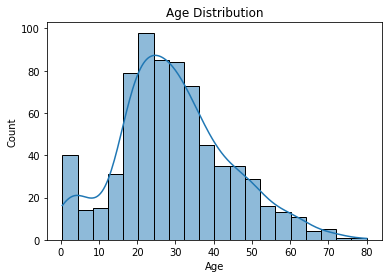

In [4]:
# Visualize the distribution of features
sns.histplot(train_data['Age'].dropna(), kde=True)
plt.title('Age Distribution')
plt.show()

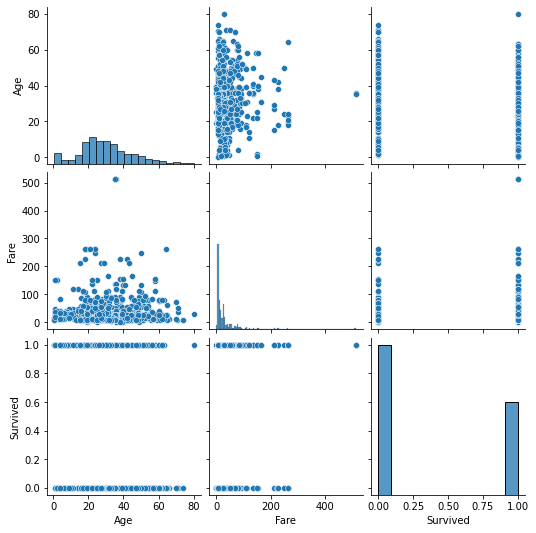

In [5]:
# Visualize the relationship between features
sns.pairplot(train_data[['Age', 'Fare', 'Survived']])
plt.show()

### Step 2 : Data Preprocessing:

In [6]:
# Handle missing values
train_data['Age'].fillna(train_data['Age'].median(), inplace=True)
train_data['Embarked'].fillna(train_data['Embarked'].mode()[0], inplace=True)
test_data['Age'].fillna(test_data['Age'].median(), inplace=True)
test_data['Fare'].fillna(test_data['Fare'].median(), inplace=True)

In [7]:
# Encode categorical variables
train_data = pd.get_dummies(train_data, columns=['Sex', 'Embarked'], drop_first=True)
test_data = pd.get_dummies(test_data, columns=['Sex', 'Embarked'], drop_first=True)

In [8]:
# Drop columns that won't be used for training
train_data.drop(['Name', 'Ticket', 'Cabin'], axis=1, inplace=True)
test_data.drop(['Name', 'Ticket', 'Cabin'], axis=1, inplace=True)

In [9]:
# Separate features and target variable
X_train = train_data.drop('Survived', axis=1)
y_train = train_data['Survived']
X_test = test_data.copy()

### Step 3 : Model Building

In [10]:
# Import necessary libraries for Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [11]:
# Split training data into training and validation sets
X_train_split, X_val_split, y_train_split, y_val_split = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

In [12]:
# Build the logistic regression model
model = LogisticRegression(max_iter=500)
model.fit(X_train_split, y_train_split)

LogisticRegression(max_iter=500)

In [13]:
# Predict on the validation set
y_val_pred = model.predict(X_val_split)

### Step 4 : Model Evaluation

In [14]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve

In [15]:
# Evaluate the performance of the model
accuracy = accuracy_score(y_val_split, y_val_pred)
precision = precision_score(y_val_split, y_val_pred)
recall = recall_score(y_val_split, y_val_pred)
f1 = f1_score(y_val_split, y_val_pred)
roc_auc = roc_auc_score(y_val_split, y_val_pred)

print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')
print(f'ROC-AUC Score: {roc_auc}')

Accuracy: 0.8044692737430168
Precision: 0.7746478873239436
Recall: 0.7432432432432432
F1 Score: 0.7586206896551724
ROC-AUC Score: 0.7954311454311453


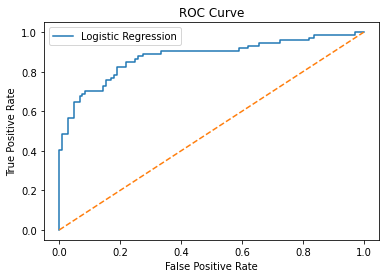

In [16]:
# Visualize the ROC curve
fpr, tpr, _ = roc_curve(y_val_split, model.predict_proba(X_val_split)[:, 1])
plt.plot(fpr, tpr, label='Logistic Regression')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

### Step 5 : Interpretation

In [17]:
# Interpreting coefficients
coefficients = pd.DataFrame(model.coef_[0], X_train.columns, columns=['Coefficient'])
print(coefficients.sort_values(by='Coefficient', ascending=False))

             Coefficient
Fare            0.002534
PassengerId     0.000350
Age            -0.031287
Embarked_Q     -0.049652
Parch          -0.122180
SibSp          -0.291983
Embarked_S     -0.383426
Pclass         -0.954503
Sex_male       -2.642497


### Step 6 : Deployment with Streamlit

In [18]:
pip install streamlit

Defaulting to user installation because normal site-packages is not writeableNote: you may need to restart the kernel to use updated packages.



In [19]:
# Install Streamlit if needed: pip install streamlit

# Streamlit App for model deployment
import streamlit as st
import pickle

In [20]:
with open('logistic_model.pkl', 'wb') as file:
    pickle.dump(model, file)

In [21]:
# Assuming you saved your model using pickle
# Save model: with open('logistic_model.pkl', 'wb') as f: pickle.dump(model, f)
model = pickle.load(open('logistic_model.pkl', 'rb'))

st.title('Titanic Survival Prediction')

2025-02-21 12:25:38.983 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-02-21 12:25:40.721 
  command:

    streamlit run C:\Users\HP\anaconda3\lib\site-packages\ipykernel_launcher.py [ARGUMENTS]
2025-02-21 12:25:40.723 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.


DeltaGenerator()

In [22]:
# Assuming this is how you trained your model, with these exact columns:
columns_used_during_training = X_train.columns  # X_train from training step

In [23]:
# User input form for predictions
pclass = st.selectbox('Pclass', [1, 2, 3])  # Corrected 'selectbox'
age = st.slider('Age', 1, 100)
fare = st.slider('Fare', 0, 600)
sex = st.selectbox('Sex', ['male', 'female'])
embarked = st.selectbox('Embarked', ['C', 'Q', 'S'])

2025-02-21 12:25:40.763 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-02-21 12:25:40.765 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-02-21 12:25:40.767 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-02-21 12:25:40.768 Session state does not function when running a script without `streamlit run`
2025-02-21 12:25:40.770 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-02-21 12:25:40.771 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-02-21 12:25:40.772 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-02-21 12:25:40.773 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-02-21 12:25

In [24]:
# Prepare the user input with all necessary features in the right order
user_input_dict = {
    'Pclass': [pclass],
    'Age': [age],
    'Fare': [fare],
    'Sex_male': [1 if sex == 'male' else 0],  # Assuming 'Sex_male' was encoded
    'Embarked_Q': [1 if embarked == 'Q' else 0],
    'Embarked_S': [1 if embarked == 'S' else 0],
    'SibSp': [0],  # Default or can add user input for this
    'Parch': [0],  # Default or can add user input for this
    'PassengerId': [9999],  # Dummy value
}

In [25]:
# Create a DataFrame from user input and ensure the column order matches the training data
user_input_df = pd.DataFrame(user_input_dict)
user_input_df = user_input_df.reindex(columns=columns_used_during_training, fill_value=0)

In [26]:
# Predict survival
prediction = model.predict(user_input_df)[0]

In [27]:
# Display the prediction result
st.write(f'The model predicts that this person {"will survive" if prediction == 1 else "will not survive"}')

2025-02-21 12:25:40.858 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-02-21 12:25:40.859 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-02-21 12:25:40.860 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-02-21 12:25:40.861 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.


### On command prompt

In [28]:
import streamlit as st

st.title("Titanic Survival Prediction")
st.write("This is a simple Streamlit app for predicting survival on the Titanic.")

2025-02-21 12:25:40.869 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-02-21 12:25:40.870 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-02-21 12:25:40.872 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-02-21 12:25:40.872 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-02-21 12:25:40.873 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-02-21 12:25:40.874 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.


# Interview Questions

### 1. What is the difference between precision and recall?
Precision and recall are evaluation metrics used in classification, especially in imbalanced datasets.

Precision measures how many of the predicted positive cases are actually positive. It is calculated as:

## TP / TP + FP
 
where TP (True Positives) are correctly predicted positive cases, and FP (False Positives) are incorrectly predicted positives.

High precision means fewer false positives, making it useful when false positives are costly (e.g., spam detection, where misclassifying a legitimate email as spam is undesirable).

Recall (also called Sensitivity) measures how many actual positive cases were correctly identified. It is calculated as:

## TP / TP + FN

where FN (False Negatives) are actual positives that were missed.

High recall is important when missing positive cases is costly, such as in medical diagnosis, where failing to detect a disease is more dangerous than a false alarm.

There is often a trade-off between precision and recall. If you increase precision, recall may decrease, and vice versa. The F1-score is used to balance both metrics.

### 2. What is cross-validation, and why is it important in binary classification?
Cross-validation is a technique used to assess a model’s performance by dividing the dataset into multiple subsets and training/testing the model on different splits.

In k-fold cross-validation, the data is split into k equal parts (folds). The model is trained on k-1 folds and tested on the remaining fold, repeating this process k times, each time using a different fold for validation. The final performance metric is the average of all k iterations.

Cross-validation is crucial in binary classification for several reasons:

Reduces Overfitting: It prevents the model from relying too heavily on a specific train-test split, leading to a more generalized model.

Provides a More Reliable Performance Estimate: A single train-test split may not represent the overall dataset well. Cross-validation ensures the model is evaluated on different portions of the data.

Helps with Hyperparameter Tuning: By testing different hyperparameter settings using cross-validation, we can choose the best combination without overfitting.

Works Well for Imbalanced Datasets: It ensures that both classes (positive and negative) are represented in training and testing across different splits.